In [81]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [84]:
audio_files = glob('E:/My_Projects/Emotion_Classifier/Emotion_Dataset(CLEANED)/*/*.wav')

In [85]:
ipd.Audio(audio_files[0])

In [86]:
y, sr = librosa.load(audio_files[0])
print(f"y : {y[:10]}")
print(f'shape y : {y.shape}')
print(f'sr : {sr}')

y : [ 1.2304068e-13 -8.7872391e-14 -1.0684482e-14 -1.9377668e-14
 -2.1113707e-14  8.4086296e-14 -1.3662992e-14 -1.3361399e-13
 -2.4548184e-15  1.5787853e-13]
shape y : (85346,)
sr : 22050


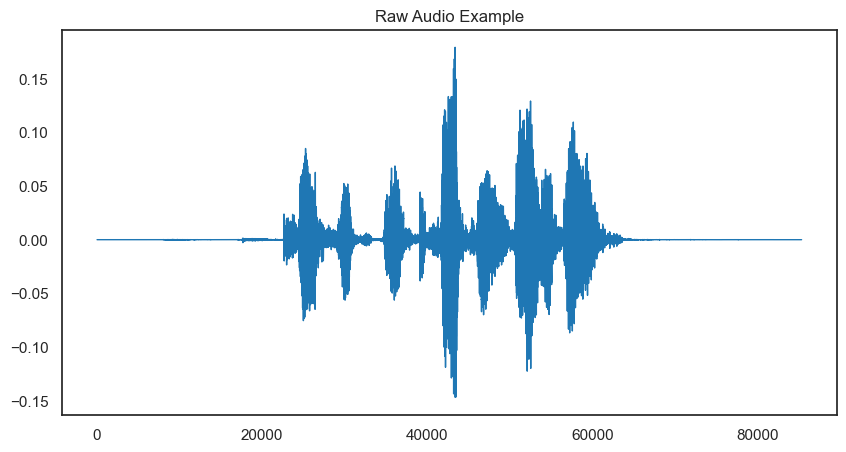

In [87]:
pd.Series(y).plot(figsize = (10,5),
                  lw=1, 
                  title='Raw Audio Example',
                  color = color_pal[0])
plt.show()

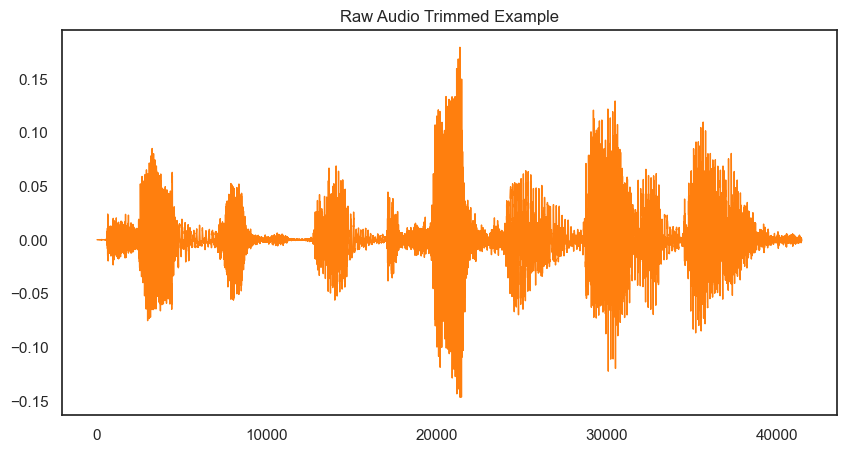

In [88]:
y_trimmed, _ = librosa.effects.trim(y, top_db=30)

pd.Series(y_trimmed).plot(figsize = (10,5),
                  lw=1, 
                  title='Raw Audio Trimmed Example',
                  color = color_pal[1])
plt.show()

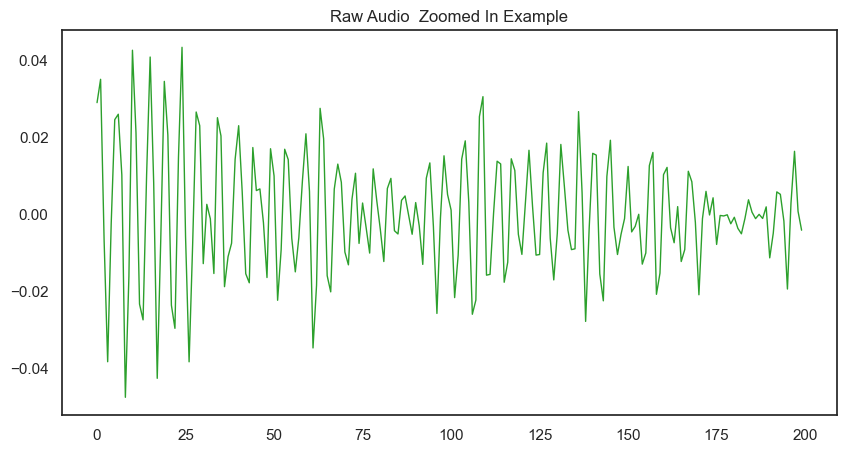

In [89]:
pd.Series(y[30500:30700]).plot(figsize = (10,5),
                  lw=1, 
                  title='Raw Audio  Zoomed In Example',
                  color = color_pal[2])
plt.show()

In [102]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs.shape

(13, 363)

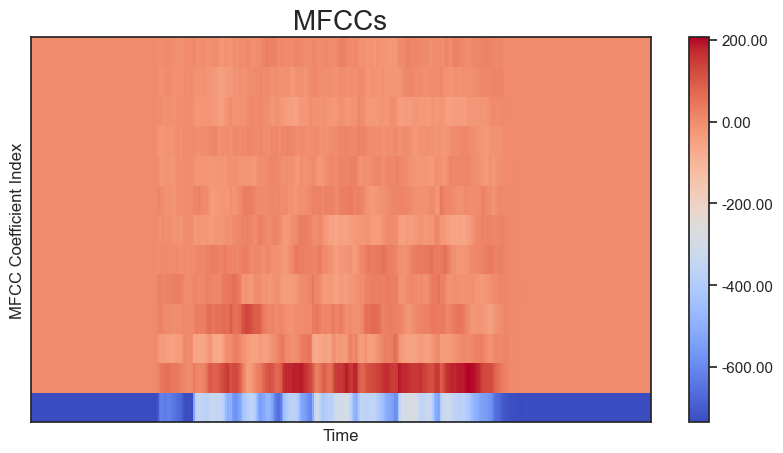

In [104]:
# Display the MFCCs
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(mfccs,
                               ax=ax)
plt.xlabel('Time')
plt.ylabel('MFCC Coefficient Index')
ax.set_title('MFCCs', fontsize = 20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [107]:
import os
import shutil
import random

# Path to the directory containing the sorted dataset
sorted_dataset_path = 'E:\My_Projects\Emotion_Classifier\Emotion_Dataset(CLEANED)'

# Output directories for train, valid, and test sets
train_path = 'E:\My_Projects\Emotion_Classifier\Emotion_Dataset(Splitted)\Train'
valid_path = 'E:\My_Projects\Emotion_Classifier\Emotion_Dataset(Splitted)\Valid'
test_path = 'E:\My_Projects\Emotion_Classifier\Emotion_Dataset(Splitted)\Test'

# Define the ratio for splitting (80-10-10)
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1

# Create output directories
for path in [train_path, valid_path, test_path]:
    if not os.path.exists(path):
        os.makedirs(path)

# Iterate through each emotion class folder
for emotion_class in os.listdir(sorted_dataset_path):
    emotion_class_path = os.path.join(sorted_dataset_path, emotion_class)

    # Skip non-directory entries (e.g., files)
    if not os.path.isdir(emotion_class_path):
        continue

    # Create subdirectories for each emotion class in train, valid, and test sets
    train_class_path = os.path.join(train_path, emotion_class)
    valid_class_path = os.path.join(valid_path, emotion_class)
    test_class_path = os.path.join(test_path, emotion_class)

    for path in [train_class_path, valid_class_path, test_class_path]:
        if not os.path.exists(path):
            os.makedirs(path)

    # List all audio files in the emotion class folder
    audio_files = os.listdir(emotion_class_path)

    # Shuffle the files randomly
    random.shuffle(audio_files)

    # Calculate the split indices
    num_files = len(audio_files)
    train_split = int(train_ratio * num_files)
    valid_split = int((train_ratio + valid_ratio) * num_files)

    # Split the files into train, valid, and test sets
    train_files = audio_files[:train_split]
    valid_files = audio_files[train_split:valid_split]
    test_files = audio_files[valid_split:]

    # Move files to their respective split folders
    for file in train_files:
        source_path = os.path.join(emotion_class_path, file)
        destination_path = os.path.join(train_class_path, file)
        shutil.copyfile(source_path, destination_path)

    for file in valid_files:
        source_path = os.path.join(emotion_class_path, file)
        destination_path = os.path.join(valid_class_path, file)
        shutil.copyfile(source_path, destination_path)

    for file in test_files:
        source_path = os.path.join(emotion_class_path, file)
        destination_path = os.path.join(test_class_path, file)
        shutil.copyfile(source_path, destination_path)

print("Dataset split into train, valid, and test sets.")


Dataset split into train, valid, and test sets.


In [108]:
import os
import librosa
import numpy as np

# Specify the paths to your train, valid, and test folders
train_folder = r"Emotion_Dataset(Splitted)\Train"
valid_folder = r"Emotion_Dataset(Splitted)\Valid"
test_folder = r"Emotion_Dataset(Splitted)\Test"

# Function to load and trim audio clips from a folder using librosa
def load_and_trim_audio_clips_from_folder(folder, target_duration=2.5):
    audio_clips = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                audio_path = os.path.join(label_folder, filename)
                # Load audio clip using librosa
                audio_clip, _ = librosa.load(audio_path, sr=None)
                
                # Trim audio clip to the target duration (2.5 seconds)
                target_length = int(target_duration * _)
                audio_clip = audio_clip[:target_length]
                
                audio_clips.append(audio_clip)
                labels.append(label)
    return np.array(audio_clips), np.array(labels)

# Function to preprocess data
def preprocess_data(train_folder, valid_folder, test_folder):
    train_audio, train_labels = load_and_trim_audio_clips_from_folder(train_folder)
    valid_audio, valid_labels = load_and_trim_audio_clips_from_folder(valid_folder)
    test_audio, test_labels = load_and_trim_audio_clips_from_folder(test_folder)
    
    print("Loaded and trimmed training data. Shapes:", train_audio.shape, train_labels.shape)
    print("Loaded and trimmed validation data. Shapes:", valid_audio.shape, valid_labels.shape)
    print("Loaded and trimmed test data. Shapes:", test_audio.shape, test_labels.shape)
    
    return train_audio, train_labels, valid_audio, valid_labels, test_audio, test_labels

# Preprocess the data
train_audio, train_labels, valid_audio, valid_labels, test_audio, test_labels = preprocess_data(train_folder, valid_folder, test_folder)


Loaded and trimmed training data. Shapes: (1147, 120000) (1147,)
Loaded and trimmed validation data. Shapes: (143, 120000) (143,)
Loaded and trimmed test data. Shapes: (150, 120000) (150,)


In [109]:
import librosa
import numpy as np

# Function to compute MFCCs
def compute_mfccs(audio_clips, sample_rate, n_mfcc=13):
    mfccs_list = []
    for audio_clip in audio_clips:
        # Compute MFCCs
        mfccs = librosa.feature.mfcc(y=audio_clip, sr=sample_rate, n_mfcc=n_mfcc)
        mfccs_list.append(mfccs)
    return np.array(mfccs_list)

# Assuming sample_rate is the sampling rate of your audio clips
sample_rate = 22050  # Adjust this based on your actual sampling rate

# Specify the number of MFCC coefficients (n_mfcc)
n_mfcc = 13  # You can adjust this value based on your requirements

# Compute MFCCs for training, validation, and test sets
train_mfccs = compute_mfccs(train_audio, sample_rate, n_mfcc)
valid_mfccs = compute_mfccs(valid_audio, sample_rate, n_mfcc)
test_mfccs = compute_mfccs(test_audio, sample_rate, n_mfcc)

# Print the shapes of the computed MFCCs
print("Training MFCCs Shape:", train_mfccs.shape)
print("Validation MFCCs Shape:", valid_mfccs.shape)
print("Test MFCCs Shape:", test_mfccs.shape)


Training MFCCs Shape: (1147, 13, 235)
Validation MFCCs Shape: (143, 13, 235)
Test MFCCs Shape: (150, 13, 235)


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Normalize data
train_mfccs /= np.max(np.abs(train_mfccs))
valid_mfccs /= np.max(np.abs(valid_mfccs))
test_mfccs /= np.max(np.abs(test_mfccs))

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
valid_labels_encoded = label_encoder.transform(valid_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convert labels to one-hot encoding
train_labels_onehot = to_categorical(train_labels_encoded)
valid_labels_onehot = to_categorical(valid_labels_encoded)
test_labels_onehot = to_categorical(test_labels_encoded)

# Save encoded labels
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


In [116]:
print(f"Training data shapes: \n train_mfccs : {train_mfccs.shape} \n train_labels_one_hot : {train_labels_onehot.shape} ")
print(f"\n Valid data shapes: \n valid_mfccs : {valid_mfccs.shape} \n valid_labels_one_hot : {valid_labels_onehot.shape} ")
print(f"\n Testing data shapes: \n test_mfccs : {test_mfccs.shape} \n test_labels_one_hot : {test_labels_onehot.shape} ")

Training data shapes: 
 train_mfccs : (1147, 13, 235) 
 train_labels_one_hot : (1147, 8) 

 Valid data shapes: 
 valid_mfccs : (143, 13, 235) 
 valid_labels_one_hot : (143, 8) 

 Testing data shapes: 
 test_mfccs : (150, 13, 235) 
 test_labels_one_hot : (150, 8) 


In [118]:
import pickle

# Save training data
with open('train_data.pkl', 'wb') as file:
    pickle.dump((train_mfccs, train_labels_onehot), file)

# Save validation data
with open('valid_data.pkl', 'wb') as file:
    pickle.dump((valid_mfccs, valid_labels_onehot), file)

# Save test data
with open('test_data.pkl', 'wb') as file:
    pickle.dump((test_mfccs, test_labels_onehot), file)
